In [2]:
import pickle 

with open('crafted/df_cleaned2.pickle', 'rb') as handle:
    df = pickle.load(handle)
    
df.columns

Index(['account_id', 'date_days_from_last_trans', 'date_year', 'date_month',
       'date_week', 'date_day', 'date_dayofweek', 'date', 'type_credit',
       'type_withdrawal', 'type_cash', 'op_credit_from_bank',
       'op_withdrawal_from_card', 'op_credit_in_cash', 'op_withdrawal_to_bank',
       'op_withdrawal_in_cash', 'amount', 'balance', 'k_symbol_household',
       'k_symbol_statement', 'k_symbol_loan', 'k_symbol_insurance',
       'k_symbol_pension', 'k_symbol_credited_interest',
       'k_symbol_sanction_interest'],
      dtype='object')

In [3]:
credit_from_bank_transactions = df[df['op_credit_from_bank']==1]
print('credit_from_bank_transactions', credit_from_bank_transactions.shape[0])
credit_in_cash_transactions = df[df['op_credit_in_cash']==1]
print('credit_in_cash_transactions', credit_in_cash_transactions.shape[0])

withdrawal_from_card_transactions = df[df['op_withdrawal_from_card']==1]
print('withdrawal_from_card_transactions', withdrawal_from_card_transactions.shape[0])
withdrawal_to_bank_transactions = df[df['op_withdrawal_to_bank']==1]
print('withdrawal_to_bank_transactions', withdrawal_to_bank_transactions.shape[0])
withdrawal_in_cash_transactions = df[df['op_withdrawal_in_cash']==1]
print('withdrawal_in_cash_transactions', withdrawal_in_cash_transactions.shape[0])


credit_from_bank_transactions 65226
credit_in_cash_transactions 156743
withdrawal_from_card_transactions 8036
withdrawal_to_bank_transactions 208283
withdrawal_in_cash_transactions 434918


## Withdrawal Analysis

In [4]:
import pandas as pd

withdrawals = pd.concat([withdrawal_from_card_transactions, withdrawal_to_bank_transactions, withdrawal_in_cash_transactions], axis=0)
withdrawals = withdrawals.drop(
    columns=['type_credit', 'type_withdrawal', 'op_credit_from_bank', 'op_credit_in_cash', 'k_symbol_loan', 'k_symbol_pension']
)

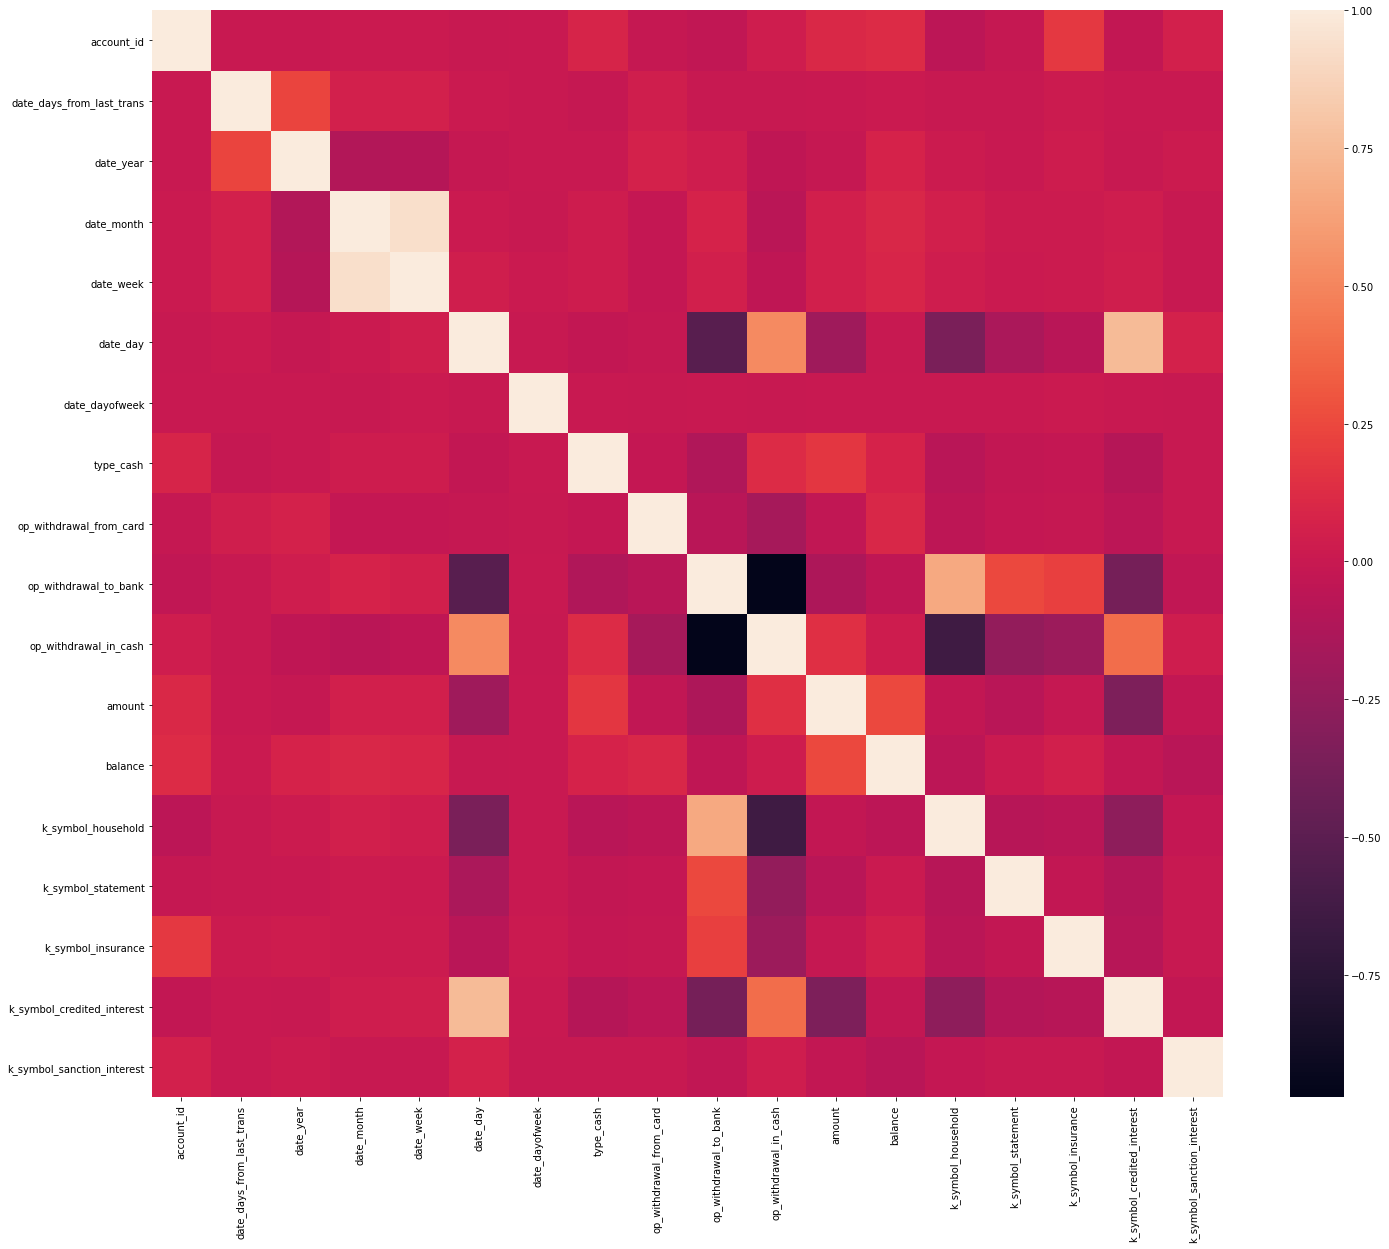

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(24,20))
cor = withdrawals.corr(method='pearson').fillna(1)
sns.heatmap(cor)
plt.show()

In [6]:
import numpy as np

threshold = 0.9

keep_columns = list(range(len(withdrawals.columns)-1))
drop_columns = []
for i in keep_columns[:-1]:
    for j in keep_columns[i+1:]:
        if np.abs(cor.iloc[i,j]) >= threshold:
            if j in keep_columns:
                drop_columns.append(j)

keep_columns = [col for col in keep_columns if col not in drop_columns]
print(len(keep_columns))

selected_columns_pearson = withdrawals.columns.values[keep_columns]
dropped_columns_pearson = withdrawals.columns.values[drop_columns]

withdrawals_pearson = withdrawals[selected_columns_pearson]
print('\nThe dropped columns are the following:')
print(dropped_columns_pearson)
print('\nThe following columns are present in the new df:')
print(selected_columns_pearson)
print(f'\nThe old df had {withdrawals.shape[1]} features. The new df has {withdrawals_pearson.shape[1]} features.')

16

The dropped columns are the following:
['date_week' 'op_withdrawal_to_bank']

The following columns are present in the new df:
['account_id' 'date_days_from_last_trans' 'date_year' 'date_month'
 'date_day' 'date_dayofweek' 'date' 'type_cash' 'op_withdrawal_from_card'
 'op_withdrawal_in_cash' 'amount' 'balance' 'k_symbol_household'
 'k_symbol_statement' 'k_symbol_insurance' 'k_symbol_credited_interest']

The old df had 19 features. The new df has 16 features.


In [7]:
withdrawals_pearson

,account_id,date_days_from_last_trans,date_year,date_month,date_day,date_dayofweek,date,type_cash,op_withdrawal_from_card,op_withdrawal_in_cash,amount,balance,k_symbol_household,k_symbol_statement,k_symbol_insurance,k_symbol_credited_interest
trans_id,,,,,,,,,,,,,,,,
1761,7,195,5,12,21,0,1998-12-21,0,1,0,5900,68175,0,0,0,0
3408,14,369,5,12,15,1,1998-12-15,0,1,0,1600,55235,0,0,0,0
3416,14,-204,5,5,29,4,1998-05-29,0,1,0,1800,40773,0,0,0,0
3417,14,94,5,8,31,0,1998-08-31,0,1,0,2800,44203,0,0,0,0
3418,14,83,5,11,22,6,1998-11-22,0,1,0,1000,38157,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682821,9814,0,4,6,30,0,1997-06-30,0,0,1,0,62358,0,0,0,0
3682961,10451,0,4,1,31,4,1997-01-31,0,0,1,1,3558,0,0,0,0
3682963,10451,0,4,2,28,4,1997-02-28,0,0,1,11,2021,0,0,0,0


In [8]:
def print_umap_graph(umap_df):
    umap_data = pd.DataFrame(
        data = umap_df,
        columns=['umap-2d-one', 'umap-2d-two']
    )

    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="umap-2d-one", y="umap-2d-two",
        palette=sns.color_palette("hls", 2),
        data=umap_data,
        legend="full",
        alpha=0.3
    )
    plt.show()

In [9]:
withdrawals_pearson = withdrawals_pearson.drop(columns=['account_id', 'date'])
withdrawals_pearson

,date_days_from_last_trans,date_year,date_month,date_day,date_dayofweek,type_cash,op_withdrawal_from_card,op_withdrawal_in_cash,amount,balance,k_symbol_household,k_symbol_statement,k_symbol_insurance,k_symbol_credited_interest
trans_id,,,,,,,,,,,,,,
1761,195,5,12,21,0,0,1,0,5900,68175,0,0,0,0
3408,369,5,12,15,1,0,1,0,1600,55235,0,0,0,0
3416,-204,5,5,29,4,0,1,0,1800,40773,0,0,0,0
3417,94,5,8,31,0,0,1,0,2800,44203,0,0,0,0
3418,83,5,11,22,6,0,1,0,1000,38157,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682821,0,4,6,30,0,0,0,1,0,62358,0,0,0,0
3682961,0,4,1,31,4,0,0,1,1,3558,0,0,0,0
3682963,0,4,2,28,4,0,0,1,11,2021,0,0,0,0


In [11]:
data = withdrawals_pearson.iloc[:100000,:]

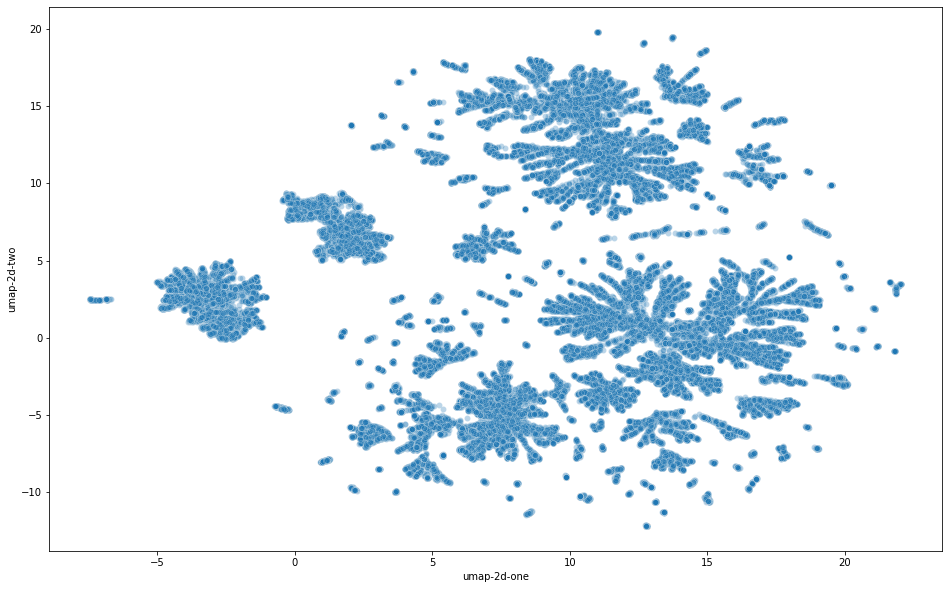

In [10]:
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

scaled_df = StandardScaler().fit_transform(data)
umap_1trans_withdrawals = umap.UMAP().fit_transform(scaled_df)
print_umap_graph(umap_1trans_withdrawals)

In [12]:
from pyod.models.iforest import IForest

isolation_forests = IForest(
    contamination=0.03,
    random_state=0
)

%time isolation_forests.fit(data)


CPU times: user 5.58 s, sys: 5.41 ms, total: 5.59 s
Wall time: 5.59 s


IForest(behaviour='old', bootstrap=False, contamination=0.03,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=1,
    random_state=0, verbose=0)

97000
3000


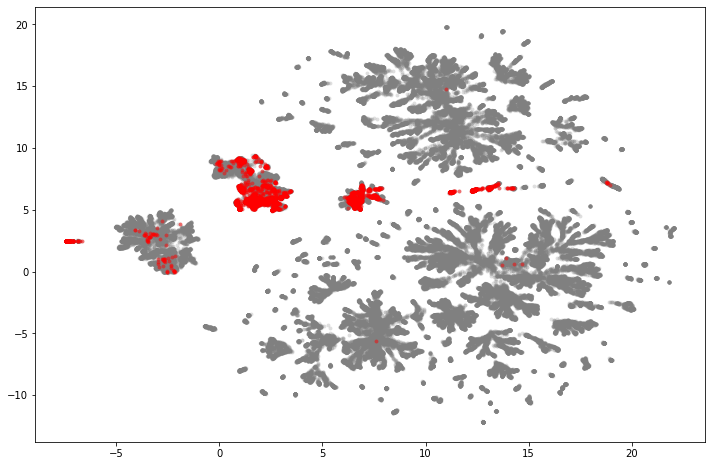

In [14]:
isolation_forests_outliers = np.where(isolation_forests.labels_ == 1)[0]
isolation_forests_inliers = np.where(isolation_forests.labels_ == 0)[0]

print(len(isolation_forests_inliers))
print(len(isolation_forests_outliers))

plt.figure(figsize=(12,8))
plt.scatter(*umap_1trans_withdrawals.T, s=15, linewidth=0, c='gray', alpha=0.25)
plt.scatter(*umap_1trans_withdrawals[isolation_forests_outliers].T, s=15, linewidth=0, c='red', alpha=0.5)
plt.show()